# **PROYECTO DE PREDICCION DE HIPERTENSION ARTERIAL**

### Problemática de Machine Learning
 Predecir si un paciente tiene probabilidades de sufrir <i>hipertensión arterial</i> en función de parámetros de entrada como sexo, edad, diversas enfermedades, tabaquismo, entre otros.

1. **Tipo:** Aprendizaje supervisado
2. **Métricas de rendimiento:**
    - Exactitud
    - Precisión
    - Recall
    - F1-score

### Sobre el dataset
* **Fuente:** https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data
* **Notebook de indicadores** https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook

### Información de los atributos
#### Variable dependiente:
* **Hypertension:** Target, 0 cuando el paciente es sano y 1 cuando es hipertenso.

#### Variables independientes:
1. **Age:** Grupo de edad del paciente [1 - 13] - (>18 años).
2. **Sex:** 0 si el paciente es masculino y 1 si es femenino.
3. **BMI:** Índice de Masa Corporal.
4. **GenHlth:** Percepción del estado de salud, [Excelente = 1] [Muy bueno = 2] [Bueno = 3] [Regular = 4] [Deficiente = 5]
5. **MentHlth:** Días percibidos en que la salud mental no fue tan buena.
6. **Salud Física:** Días percibidos en que la salud física no fue tan buena.
7. **DiffWalk:** Dificultad para caminar o subir escaleras, [No = 0] [Si = 1].
8. **Fruits:** Consumo de frutas 1 o más veces al día, [No = 0] [Si = 1].
9. **Veggies:** Consumo de verduras 1 o más veces al día, [No = 0] [Si = 1].
10. **Smoker:** Consumo cigarros, [No = 0] [Si = 1].
11. **HvyAlcoholConsump:** Alto consumo de alcohol, [No = 0] [Si = 1].
12. **PhysActivity:** Actividad física en los últimos 30 días, [No = 0] [Si = 1].
13. **HighChol:** Profesional médico indico si tiene colesterol alto, [No = 0] [Si = 1].
14. **CholCheck:** Control de colesterol en los últimos 5 años, [No = 0] [Si = 1].
15. **Diabetes:** Estado de diabetes, [Sin diabetes = 0] [Prediabetes = 1] [Diabetes = 2]
16. **Stroke:** Paciente padeció un accidente cerebrovascular (acv), [No = 0] [Si = 1].
17. **HeartDiseaseorAttack:** Paciente padeció de una enfermedad cardiovascular o infarto de miocardio, [No = 0] [Si = 1].

## Importación de Librerias y datos


### Importación de librerías
Importando todos los módulos de Python necesarios

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

#### Lectura de datos

In [4]:
# Lee el archivo CSV
DF = pd.read_csv('/PrediHipertension/dataset/dataset_hypertension.csv')
print ('Forma inicial del DataFrame: ' , DF.shape)
# Define el nombre de la columna que deseas mover al último lugar y realiza la operación
columna_a_mover = 'HighBP'
if columna_a_mover in DF.columns:
    DF = DF[[col for col in DF.columns if col != columna_a_mover] + [columna_a_mover]].rename(columns={'HighBP': 'Hypertension'})

# Define las columnas a eliminar y elimínalas si están presentes
columnas_a_eliminar = ['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income']
DF = DF.drop(columns=[col for col in columnas_a_eliminar if col in DF.columns])

# Define el orden deseado de las columnas y reordena el DataFrame según el nuevo orden
nuevo_orden = ['Age', 'Sex', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'HighChol', 'CholCheck', 'Diabetes', 'Stroke', 'HeartDiseaseorAttack', 'Hypertension']
DF = DF[nuevo_orden]

# Imprime la forma del DataFrame y muestra las primeras 10 filas
print('Forma final del DataFrame:', DF.shape)

# Mostrar 5 datos aleatorios
DF.sample(5)

Forma inicial del DataFrame:  (253680, 22)
Forma final del DataFrame: (253680, 18)


,Age,Sex,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Fruits,Veggies,Smoker,HvyAlcoholConsump,PhysActivity,HighChol,CholCheck,Diabetes,Stroke,HeartDiseaseorAttack,Hypertension
168442,10.0,0.0,29.0,3.0,5.0,15.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5201,6.0,0.0,21.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
144864,8.0,0.0,19.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16692,7.0,1.0,26.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
171177,6.0,0.0,41.0,3.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## Procesamiento de datos

#### Valores nulos

In [5]:
DF.isnull().sum()

Age                     0
Sex                     0
BMI                     0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Fruits                  0
Veggies                 0
Smoker                  0
HvyAlcoholConsump       0
PhysActivity            0
HighChol                0
CholCheck               0
Diabetes                0
Stroke                  0
HeartDiseaseorAttack    0
Hypertension            0
dtype: int64

#### Información de las columnas del DataFrame

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   253680 non-null  float64
 1   Sex                   253680 non-null  float64
 2   BMI                   253680 non-null  float64
 3   GenHlth               253680 non-null  float64
 4   MentHlth              253680 non-null  float64
 5   PhysHlth              253680 non-null  float64
 6   DiffWalk              253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   Smoker                253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  PhysActivity          253680 non-null  float64
 12  HighChol              253680 non-null  float64
 13  CholCheck             253680 non-null  float64
 14  Diabetes              253680 non-null  float64
 15  

#### Información del tipo de dato de cada variable

In [7]:
DF.dtypes

Age                     float64
Sex                     float64
BMI                     float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Fruits                  float64
Veggies                 float64
Smoker                  float64
HvyAlcoholConsump       float64
PhysActivity            float64
HighChol                float64
CholCheck               float64
Diabetes                float64
Stroke                  float64
HeartDiseaseorAttack    float64
Hypertension            float64
dtype: object

#### Descripción estadística de las variables

In [8]:
DF.describe()

,Age,Sex,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Fruits,Veggies,Smoker,HvyAlcoholConsump,PhysActivity,HighChol,CholCheck,Diabetes,Stroke,HeartDiseaseorAttack,Hypertension
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,8.032119,0.440342,28.382364,2.511392,3.184772,4.242081,0.168224,0.634256,0.811420,0.443169,0.056197,0.756544,0.424121,0.962670,0.296921,0.040571,0.094186,0.429001
std,3.054220,0.496429,6.608694,1.068477,7.412847,8.717951,0.374066,0.481639,0.391175,0.496761,0.230302,0.429169,0.494210,0.189571,0.698160,0.197294,0.292087,0.494934
min,1.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.000000,27.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1.000000,31.000000,3.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,13.000000,1.000000,98.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


#### Cambiar el tipo de dato

In [9]:
variables = nuevo_orden
variables_enteras = ['Age','Sex','GenHlth','MentHlth','PhysHlth','DiffWalk','Fruits','Veggies','Smoker','HvyAlcoholConsump','PhysActivity','HighChol','CholCheck','Diabetes','Stroke','HeartDiseaseorAttack','Hypertension']
variables_decimales = ['BMI']

# Converting features into required datatypes
DF[variables_enteras] = DF[variables_enteras].astype(np.int8)
# data types
DF[variables].dtypes.to_frame(name="Data type")
# Mostrar la nueva informacion del DataFrame
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   253680 non-null  int8   
 1   Sex                   253680 non-null  int8   
 2   BMI                   253680 non-null  float64
 3   GenHlth               253680 non-null  int8   
 4   MentHlth              253680 non-null  int8   
 5   PhysHlth              253680 non-null  int8   
 6   DiffWalk              253680 non-null  int8   
 7   Fruits                253680 non-null  int8   
 8   Veggies               253680 non-null  int8   
 9   Smoker                253680 non-null  int8   
 10  HvyAlcoholConsump     253680 non-null  int8   
 11  PhysActivity          253680 non-null  int8   
 12  HighChol              253680 non-null  int8   
 13  CholCheck             253680 non-null  int8   
 14  Diabetes              253680 non-null  int8   
 15  

## Análisis exploratorio de datos

#### Cantidad de pacientes sanos e hipertensos

Tienen Hipertensión:  108829
No tienen Hipertensión:  144851


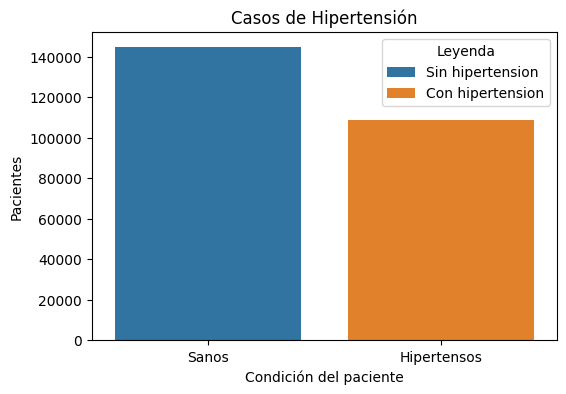

In [10]:
# Cantidad de pacientes con hipertensión
print('Tienen Hipertensión: ',DF.Hypertension.value_counts()[1])
print('No tienen Hipertensión: ', DF.Hypertension.value_counts()[0])
DF['Hypertension'].value_counts()

# Establece el tamaño de la figura
plt.figure(figsize=(6, 4))

# Cuadro comparativo de pacientes hipertensos y no hipertensos
sns.countplot(data=DF,x='Hypertension',hue='Hypertension')
plt.title('Casos de Hipertensión')
plt.xlabel('Condición del paciente')
plt.xticks(ticks=[0, 1], labels=['Sanos', 'Hipertensos'])
plt.ylabel('Pacientes')
plt.legend(title='Leyenda', labels =['Sin hipertension', 'Con hipertension'])

#### Influencia de la edad con la  hipertension


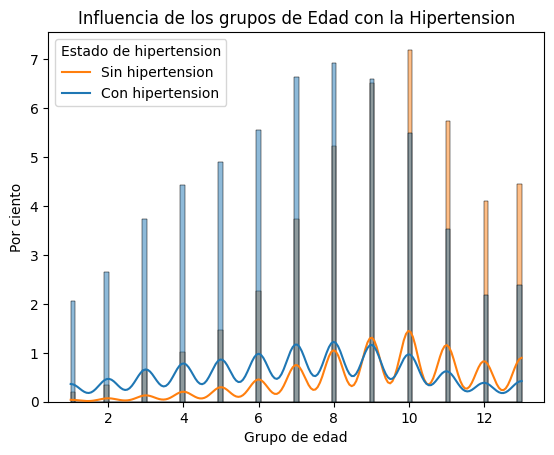

In [11]:
sns.histplot(data=DF,x='Age',hue='Hypertension',kde=True,stat='percent')

plt.title('Influencia de los grupos de Edad con la Hipertension')
plt.xlabel('Grupo de edad')
plt.ylabel('Por ciento')
plt.legend(title='Estado de hipertension', labels =['Sin hipertension', 'Con hipertension'])

#### Cantidad de hombres y mujeres en el DataFrame

Hombres: 111706
Mujeres: 141974
-----------------------------------------------
Mujeres sanas: 84321
Mujeres hipertensas: 57653
Hombres sanos: 60530
Hombres hipertensos: 51176


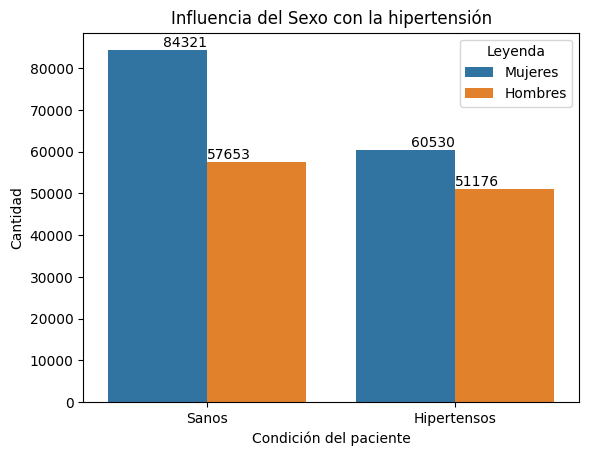

In [12]:
# Cantidad de hombres y mujeres en el DataFrame
hombres_count = DF['Sex'].value_counts()[1]
mujeres_count = DF['Sex'].value_counts()[0]
print('Hombres:', hombres_count)
print('Mujeres:', mujeres_count)
print('-----------------------------------------------')

# Cálculo de la cantidad de personas sanas e hipertensas para hombres y mujeres
sanos_mujeres = len(DF[(DF['Sex'] == 0) & (DF['Hypertension'] == 0)])
hipertensos_mujeres = len(DF[(DF['Sex'] == 0) & (DF['Hypertension'] == 1)])
sanos_hombres = len(DF[(DF['Sex'] == 1) & (DF['Hypertension'] == 0)])
hipertensos_hombres = len(DF[(DF['Sex'] == 1) & (DF['Hypertension'] == 1)])
print('Mujeres sanas:', sanos_mujeres)
print('Mujeres hipertensas:', hipertensos_mujeres)
print('Hombres sanos:', sanos_hombres)
print('Hombres hipertensos:', hipertensos_hombres)

# Visualización del gráfico
sns.countplot(data=DF, x='Sex', hue='Hypertension')
plt.title('Influencia del Sexo con la hipertensión')
plt.xlabel('Condición del paciente')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Sanos', 'Hipertensos'])
plt.legend(title='Leyenda', labels=['Mujeres', 'Hombres'])

# Agregar el texto correspondiente a cada columna
plt.text(0, sanos_mujeres, sanos_mujeres, ha='right', va='bottom')
plt.text(0, hipertensos_mujeres, hipertensos_mujeres, ha='left', va='bottom')
plt.text(1, sanos_hombres, sanos_hombres, ha='right', va='bottom')
plt.text(1, hipertensos_hombres, hipertensos_hombres, ha='left', va='bottom')

plt.show()


#### Influencia del IMC con la hipertension


Hombres:  111706
Mujeres:  141974


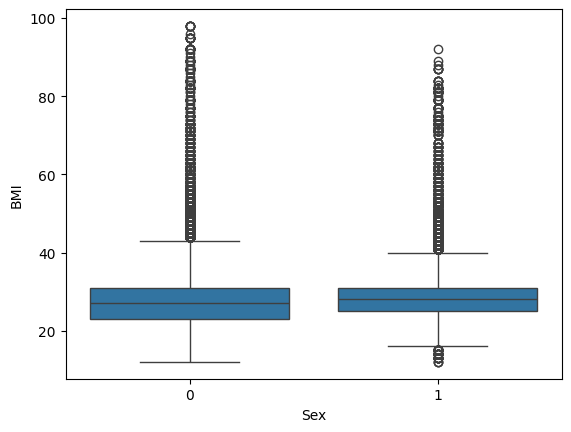

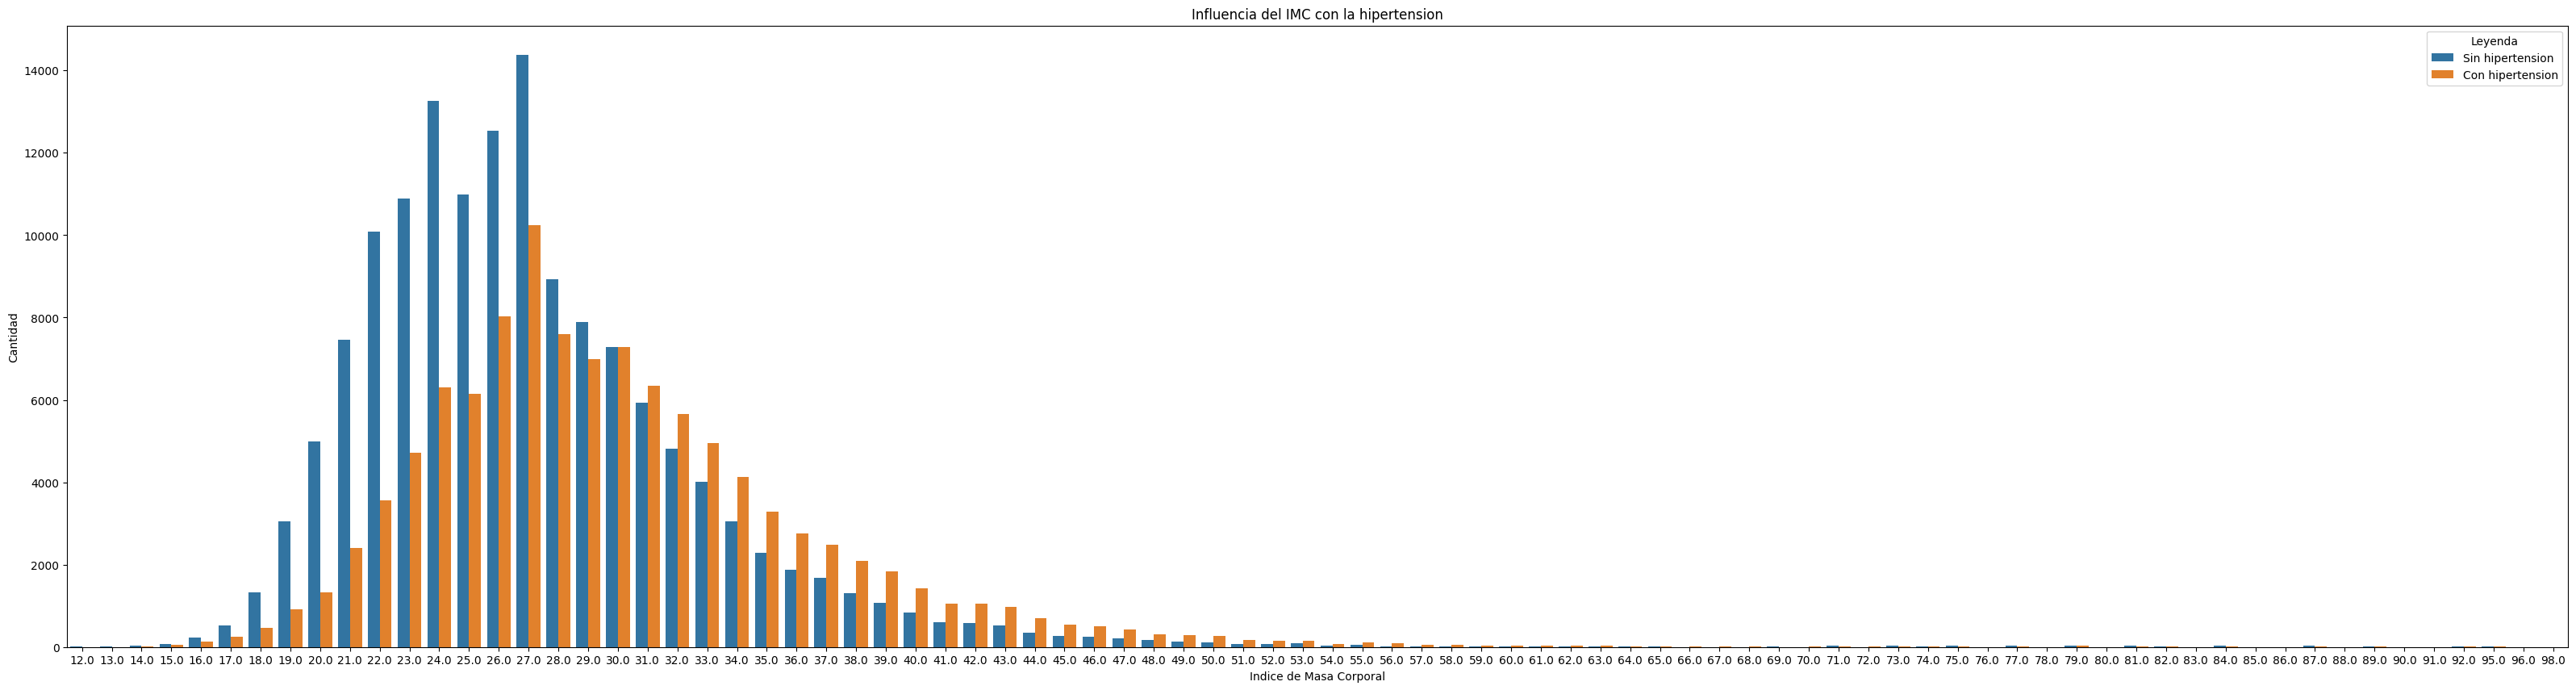

In [13]:
print('Hombres: ', DF.Sex.value_counts()[1])
print('Mujeres: ', DF.Sex.value_counts()[0])
sns.boxplot(x='Sex', y='BMI', data=DF)
plt.show()

plt.figure(figsize=(40, 10))
sns.countplot(data=DF,x='BMI',hue='Hypertension')
plt.title('Influencia del IMC con la hipertension')
plt.xlabel('Indice de Masa Corporal')
plt.ylabel('Cantidad')
plt.legend(title='Leyenda', labels =['Sin hipertension', 'Con hipertension'])

#### Mostrar información general de salud por sexo del paciente


Excelente:  45299
Muy bueno:  89084
Bueno:  75646
Regular:  31570
Deficiente:  12081


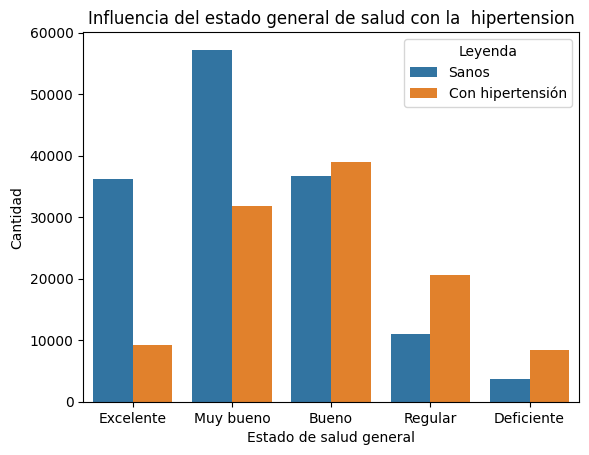

In [14]:
# Cantidad de pacientes por salud en general
print('Excelente: ', DF.GenHlth.value_counts()[1])
print('Muy bueno: ', DF.GenHlth.value_counts()[2])
print('Bueno: ', DF.GenHlth.value_counts()[3])
print('Regular: ', DF.GenHlth.value_counts()[4])
print('Deficiente: ', DF.GenHlth.value_counts()[5])

sns.countplot(data=DF,x='GenHlth',hue='Hypertension')
plt.title('Influencia del estado general de salud con la  hipertension')
plt.xlabel('Estado de salud general')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Excelente', 'Muy bueno', 'Bueno', 'Regular', 'Deficiente'])
plt.legend(title='Leyenda', labels =['Sanos', 'Con hipertensión'])

#### Consumo de frutas

Comen frutas:  160898
No comen frutas:  92782


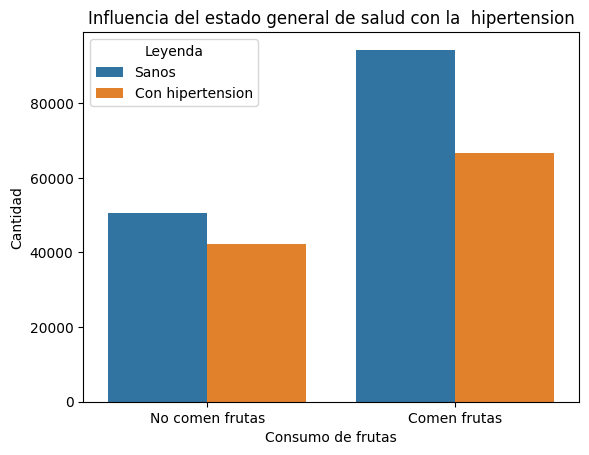

In [15]:
# Cantidad de pacientes que comen frutas
print('Comen frutas: ',DF.Fruits.value_counts()[1])
print('No comen frutas: ',DF.Fruits.value_counts()[0])
# 3. Influencia del grado academico con la  hipertension
sns.countplot(data=DF,x='Fruits',hue='Hypertension')
plt.title('Influencia del estado general de salud con la  hipertension')
plt.xlabel('Consumo de frutas')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No comen frutas', 'Comen frutas'])
plt.legend(title='Leyenda', labels =['Sanos', 'Con hipertension'])

Comen frutas: 160898
No comen frutas: 92782
-----------------------------------------------
Pacientes sanos que no comen frutas: 50526
Pacientes hipertensos que no comen frutas: 42256
Pacientes sanos que comen frutas: 94325
Pacientes hipertensos que comen frutas: 66573


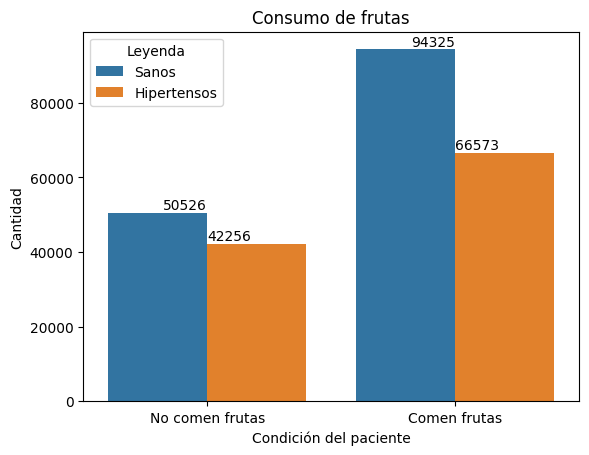

In [16]:
# Cantidad de hombres y mujeres en el DataFrame
comen_frutas = DF['Fruits'].value_counts()[1]
no_comen_frutas = DF['Fruits'].value_counts()[0]
print('Comen frutas:', comen_frutas)
print('No comen frutas:', no_comen_frutas)
print('-----------------------------------------------')

# Cálculo de la cantidad de personas sanas e hipertensas para hombres y mujeres
nofrutas_sanos = len(DF[(DF['Fruits'] == 0) & (DF['Hypertension'] == 0)])
nofrutas_hipertensos = len(DF[(DF['Fruits'] == 0) & (DF['Hypertension'] == 1)])
frutas_sanos = len(DF[(DF['Fruits'] == 1) & (DF['Hypertension'] == 0)])
frutas_hipertensos = len(DF[(DF['Fruits'] == 1) & (DF['Hypertension'] == 1)])
print('Pacientes sanos que no comen frutas:', nofrutas_sanos)
print('Pacientes hipertensos que no comen frutas:', nofrutas_hipertensos)
print('Pacientes sanos que comen frutas:', frutas_sanos)
print('Pacientes hipertensos que comen frutas:', frutas_hipertensos)

# Visualización del gráfico
sns.countplot(data=DF, x='Fruits', hue='Hypertension')
plt.title('Consumo de frutas')
plt.xlabel('Condición del paciente')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No comen frutas', 'Comen frutas'])
plt.legend(title='Leyenda', labels=['Sanos', 'Hipertensos'])

# Agregar el texto correspondiente a cada columna
plt.text(0, nofrutas_sanos, nofrutas_sanos, ha='right', va='bottom')
plt.text(0, nofrutas_hipertensos, nofrutas_hipertensos, ha='left', va='bottom')
plt.text(1, frutas_sanos, frutas_sanos, ha='right', va='bottom')
plt.text(1, frutas_hipertensos, frutas_hipertensos, ha='left', va='bottom')

plt.show()


## Balanceo de datos

### Visualización de los datos sin SMOTE

In [17]:
x = DF.drop('Hypertension', axis= 1).values
y = DF['Hypertension']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state= 42)

print('Proporción de personas hipertensas en los conjuntos de entrenamiento y prueba\n')
print(f'''% Personas hipertensas en el conjunto de entrenamiento = {np.round(y_train.value_counts(normalize = True)[1] * 100, 2)}
% Personas hipertensas en el conjunto de prueba = {np.round(y_test.value_counts(normalize = True)[1] * 100, 2)}''')

Proporción de personas hipertensas en los conjuntos de entrenamiento y prueba

% Personas hipertensas en el conjunto de entrenamiento = 42.82
% Personas hipertensas en el conjunto de prueba = 43.22


#### Caso hipotético de entrenar con datos desbalanceados


Métricas de rendimiento para el conjunto de entrenamiento:
Accuracy: 0.93
Precision: 0.94
Recall: 0.89
F1-score: 0.91


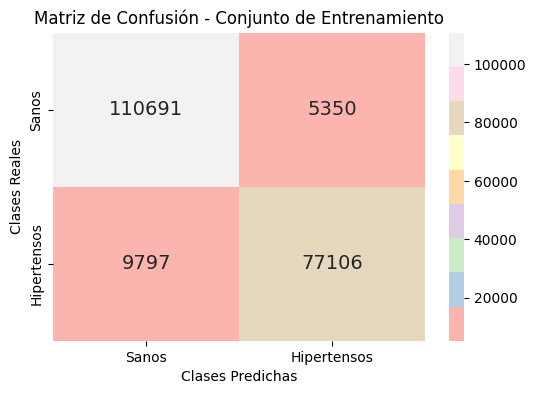


Métricas de rendimiento para el conjunto de prueba:
Accuracy: 0.70
Precision: 0.66
Recall: 0.64
F1-score: 0.65


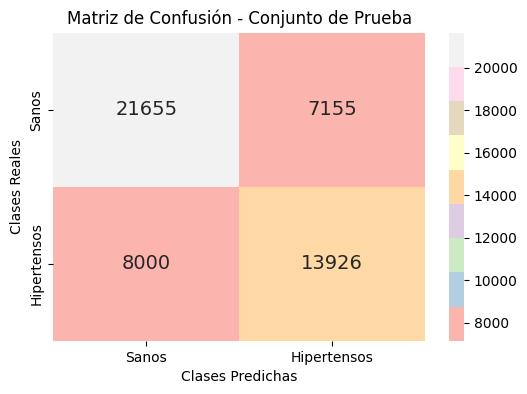

In [18]:
# Entrenamiento sin SMOTE
model_sinsmote = RandomForestClassifier(random_state=42)
model_sinsmote.fit(x_train, y_train)
preds = model_sinsmote.predict(x_test)

# Predicciones en el conjunto de entrenamiento
train_preds = model_sinsmote.predict(x_train)

# Predicciones en el conjunto de prueba
test_preds = model_sinsmote.predict(x_test)

# Métricas de rendimiento para el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds)
train_recall = recall_score(y_train, train_preds)
train_f1 = f1_score(y_train, train_preds)
confusion_mat_train = confusion_matrix(y_train, train_preds)

# Métricas de rendimiento para el conjunto de prueba
test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)
confusion_mat_test = confusion_matrix(y_test, test_preds)

# Función para graficar matriz de confusión
def plot_confusion_matrix(confusion_matrix, classes, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Clases Predichas')
    plt.ylabel('Clases Reales')
    plt.title(title)
    plt.show()

# Imprimir las métricas de rendimiento para ambos conjuntos
print("\nMétricas de rendimiento para el conjunto de entrenamiento:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-score: {train_f1:.2f}")

# Graficar matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(confusion_mat_train, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto de Entrenamiento')

print("\nMétricas de rendimiento para el conjunto de prueba:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")

# Graficar matriz de confusión para el conjunto de prueba
plot_confusion_matrix(confusion_mat_test, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto de Prueba')


### Visualización de los datos con SMOTE

In [19]:
x = DF.drop('Hypertension', axis=1).values
y = DF['Hypertension']

sm = SMOTE(random_state= 42)

x_sm, y_sm = sm.fit_resample(x, y)

print(f'''Cambio de X antes de SMOTE: {x.shape}
Cambio de x despues de SMOTE: {x_sm.shape}''')

print('\nBalance positivo y negativo de las clases (%):')
y_sm.value_counts(normalize= True)*100

Cambio de X antes de SMOTE: (253680, 17)
Cambio de x despues de SMOTE: (289702, 17)

Balance positivo y negativo de las clases (%):


Hypertension
1    50.0
0    50.0
Name: proportion, dtype: float64

## Correlación

### Correlación entre las variables

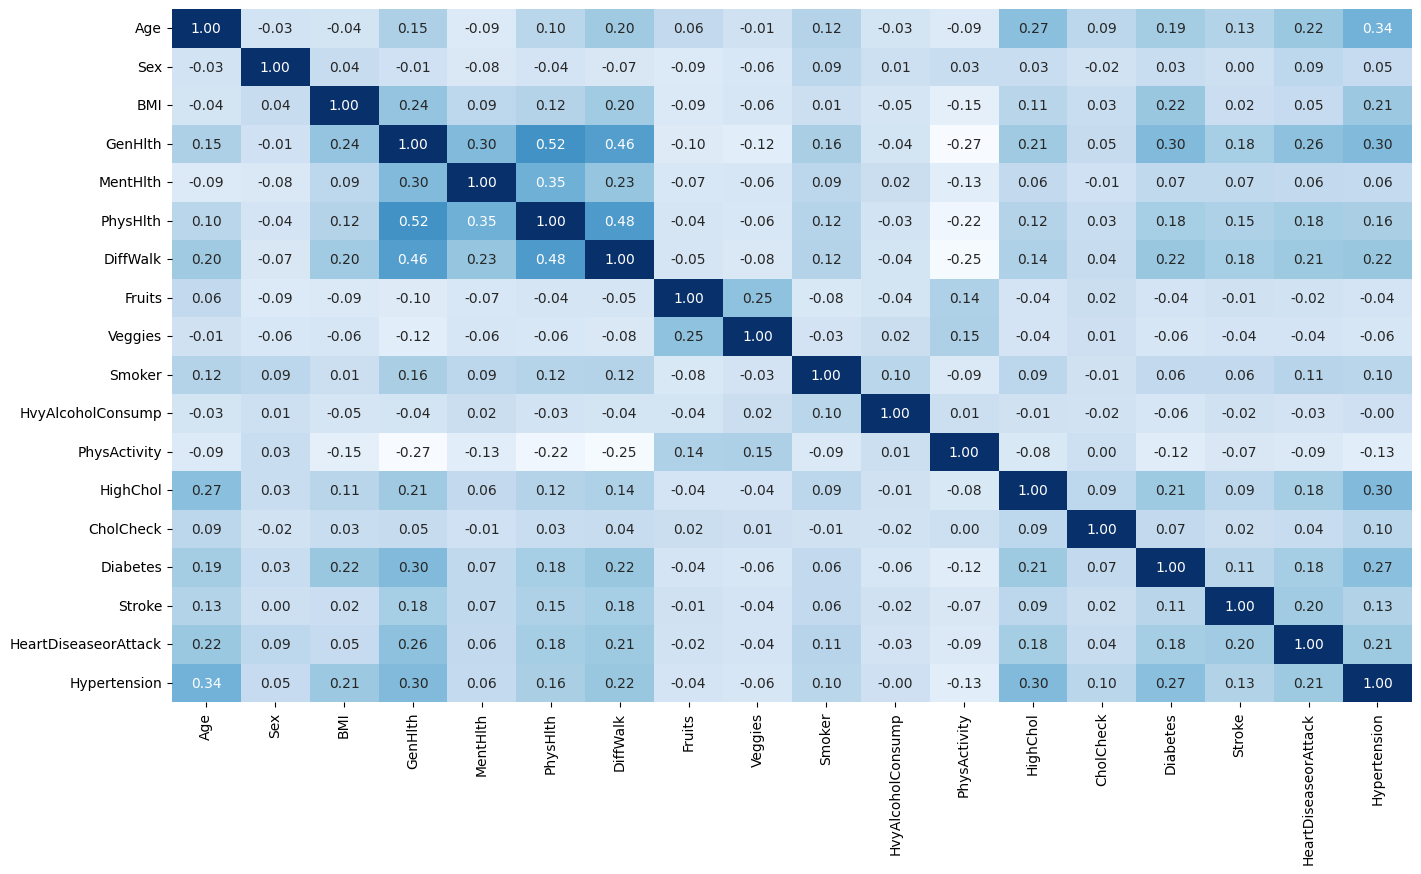

In [20]:
# Calcula la matriz de correlación
corr = DF.corr()

# Configura el tamaño de la figura para la visualización
plt.figure(figsize=(16, 9))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True, fmt='.2f')

# Muestra el mapa de calor
plt.show()

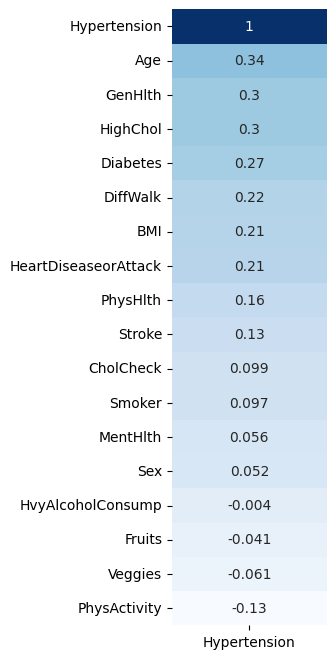

In [21]:
corr = DF.corr()['Hypertension'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2, 8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

## Machine Learning
### Random Forest

### División datos: Entrenamiento y Prueba

Dividir el conjunto de datos total en conjuntos de entrenamiento y prueba:
* Para Entrenamiento: 80% de los datos
* Para probar: el 20% de los datos


Resultados para el conjunto de entrenamiento:
Exactitud: 0.929
Precisión: 0.941
Recall: 0.916
Puntuación F1: 0.928


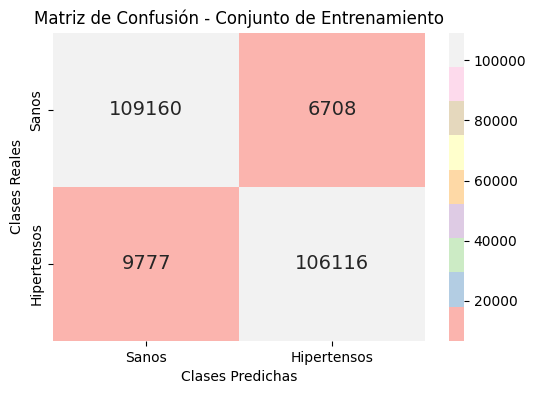


Resultados para el conjunto de prueba:
Exactitud: 0.731
Precisión: 0.732
Recall: 0.728
Puntuación F1: 0.73


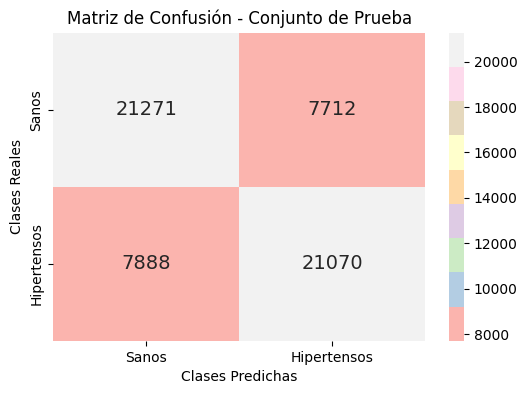

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.20, random_state=42)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

# Metricas de rendimiento en el conjunto de datos de entrenamiento
exactitud_entrenamiento = round(accuracy_score(y_train, model_rf.predict(x_train)), 3)
precision_entrenamiento = round(precision_score(y_train, model_rf.predict(x_train)), 3)
recall_entrenamiento = round(recall_score(y_train, model_rf.predict(x_train)), 3)
f1_entrenamiento = round(f1_score(y_train, model_rf.predict(x_train)), 3)
confusion_mat_train = confusion_matrix(y_train, model_rf.predict(x_train))

# Metricas de rendimiento en el conjunto de datos de prueba
exactitud_prueba = round(accuracy_score(y_test, model_rf.predict(x_test)), 3)
precision_prueba = round(precision_score(y_test, model_rf.predict(x_test)), 3)
recall_prueba = round(recall_score(y_test, model_rf.predict(x_test)), 3)
f1_prueba = round(f1_score(y_test, model_rf.predict(x_test)), 3)
confusion_mat_test = confusion_matrix(y_test, model_rf.predict(x_test))

# Función para graficar matriz de confusión
def plot_confusion_matrix(confusion_matrix, classes, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Clases Predichas')
    plt.ylabel('Clases Reales')
    plt.title(title)
    plt.show()

# Imprimir resultados para el conjunto de entrenamiento
print("\nResultados para el conjunto de entrenamiento:")
print("Exactitud:", exactitud_entrenamiento)
print("Precisión:", precision_entrenamiento)
print("Recall:", recall_entrenamiento)
print("Puntuación F1:", f1_entrenamiento)

# Graficar matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(confusion_mat_train, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto de Entrenamiento')

# Imprimir resultados para el conjunto de prueba
print("\nResultados para el conjunto de prueba:")
print("Exactitud:", exactitud_prueba)
print("Precisión:", precision_prueba)
print("Recall:", recall_prueba)
print("Puntuación F1:", f1_prueba)

# Graficar matriz de confusión para el conjunto de prueba
plot_confusion_matrix(confusion_mat_test, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto de Prueba')


Resultados para el conjunto de entrenamiento:
Exactitud: 0.929
Precisión: 0.941
Recall: 0.915
Puntuación F1: 0.928


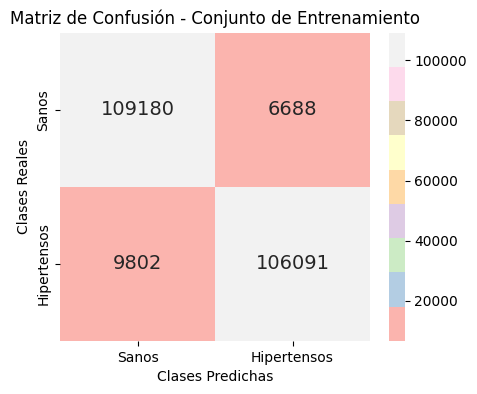


Resultados para el conjunto de validación:
Exactitud: 0.731
Precisión: 0.732
Recall: 0.729
Puntuación F1: 0.731


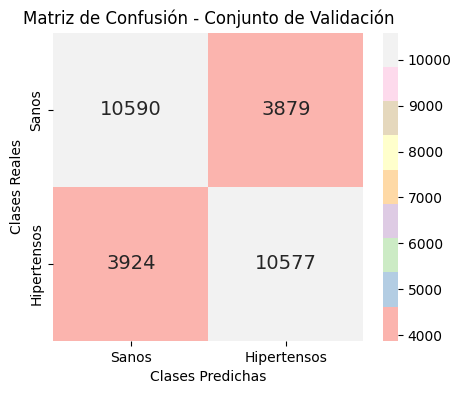


Resultados para el conjunto de pruebas:
Exactitud: 0.73
Precisión: 0.733
Recall: 0.723
Puntuación F1: 0.728


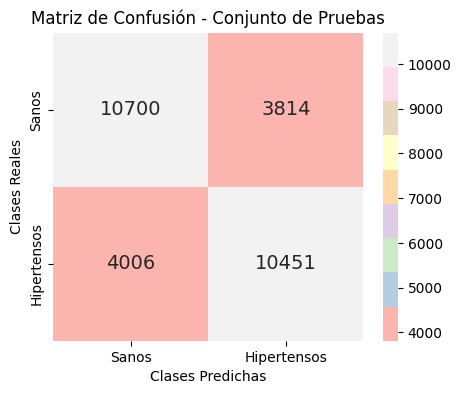

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# División de los datos en conjunto de entrenamiento (80%), conjunto de validación (10%) y conjunto de pruebas (10%)
x_train, x_temp, y_train, y_temp = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

# Entrenamiento del modelo
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

# Métricas de rendimiento en el conjunto de datos de entrenamiento
exactitud_entrenamiento = round(accuracy_score(y_train, model_rf.predict(x_train)), 3)
precision_entrenamiento = round(precision_score(y_train, model_rf.predict(x_train)), 3)
recall_entrenamiento = round(recall_score(y_train, model_rf.predict(x_train)), 3)
f1_entrenamiento = round(f1_score(y_train, model_rf.predict(x_train)), 3)
confusion_mat_train = confusion_matrix(y_train, model_rf.predict(x_train))

# Métricas de rendimiento en el conjunto de datos de validación
exactitud_validacion = round(accuracy_score(y_val, model_rf.predict(x_val)), 3)
precision_validacion = round(precision_score(y_val, model_rf.predict(x_val)), 3)
recall_validacion = round(recall_score(y_val, model_rf.predict(x_val)), 3)
f1_validacion = round(f1_score(y_val, model_rf.predict(x_val)), 3)
confusion_mat_val = confusion_matrix(y_val, model_rf.predict(x_val))

# Métricas de rendimiento en el conjunto de datos de pruebas
exactitud_prueba = round(accuracy_score(y_test, model_rf.predict(x_test)), 3)
precision_prueba = round(precision_score(y_test, model_rf.predict(x_test)), 3)
recall_prueba = round(recall_score(y_test, model_rf.predict(x_test)), 3)
f1_prueba = round(f1_score(y_test, model_rf.predict(x_test)), 3)
confusion_mat_test = confusion_matrix(y_test, model_rf.predict(x_test))

# Función para graficar matriz de confusión
def plot_confusion_matrix(confusion_matrix, classes, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Clases Predichas')
    plt.ylabel('Clases Reales')
    plt.title(title)
    plt.show()

# Imprimir resultados para el conjunto de entrenamiento
print("\nResultados para el conjunto de entrenamiento:")
print("Exactitud:", exactitud_entrenamiento)
print("Precisión:", precision_entrenamiento)
print("Recall:", recall_entrenamiento)
print("Puntuación F1:", f1_entrenamiento)

# Graficar matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(confusion_mat_train, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto de Entrenamiento')

# Imprimir resultados para el conjunto de validación
print("\nResultados para el conjunto de validación:")
print("Exactitud:", exactitud_validacion)
print("Precisión:", precision_validacion)
print("Recall:", recall_validacion)
print("Puntuación F1:", f1_validacion)

# Graficar matriz de confusión para el conjunto de validación
plot_confusion_matrix(confusion_mat_val, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto de Validación')

# Imprimir resultados para el conjunto de pruebas
print("\nResultados para el conjunto de pruebas:")
print("Exactitud:", exactitud_prueba)
print("Precisión:", precision_prueba)
print("Recall:", recall_prueba)
print("Puntuación F1:", f1_prueba)

# Graficar matriz de confusión para el conjunto de pruebas
plot_confusion_matrix(confusion_mat_test, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto de Pruebas')



Resultados para el conjunto completo:
Exactitud: 0.925
Precisión: 0.936
Recall: 0.911
Puntuación F1: 0.924


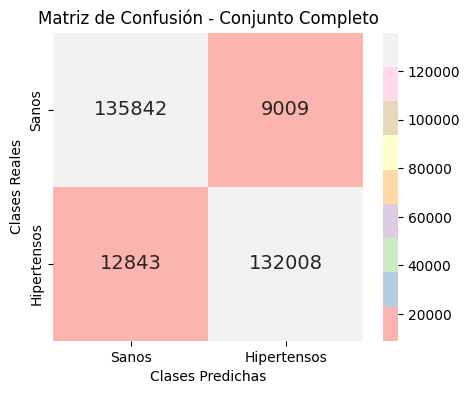

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# División de los datos en conjunto de entrenamiento (80%) y conjunto de pruebas (20%)
x_train_val, x_test, y_train_val, y_test = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)

# De ese 80% restante, dividir entre conjunto de entrenamiento (80%) y conjunto de validación (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

# Combinar conjuntos de entrenamiento, validación y prueba
x_train_full = np.concatenate((x_train, x_val, x_test))
y_train_full = np.concatenate((y_train, y_val, y_test))

# Entrenamiento del modelo en el conjunto completo
model_rf = RandomForestClassifier(random_state=99)
model_rf.fit(x_train_full, y_train_full)

# Métricas de rendimiento en el conjunto completo
exactitud_total = round(accuracy_score(y_train_full, model_rf.predict(x_train_full)), 3)
precision_total = round(precision_score(y_train_full, model_rf.predict(x_train_full)), 3)
recall_total = round(recall_score(y_train_full, model_rf.predict(x_train_full)), 3)
f1_total = round(f1_score(y_train_full, model_rf.predict(x_train_full)), 3)
confusion_mat_total = confusion_matrix(y_train_full, model_rf.predict(x_train_full))

# Función para graficar matriz de confusión
def plot_confusion_matrix(confusion_matrix, classes, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix, annot=True, cmap='Pastel1', fmt='g', annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Clases Predichas')
    plt.ylabel('Clases Reales')
    plt.title(title)
    plt.show()

# Imprimir resultados para el conjunto completo
    print("\nResultados para el conjunto completo:")
    print("Exactitud:", exactitud_total)
    print("Precisión:", precision_total)
    print("Recall:", recall_total)
    print("Puntuación F1:", f1_total)

# Graficar matriz de confusión para el conjunto completo
plot_confusion_matrix(confusion_mat_total, classes=['Sanos', 'Hipertensos'], title='Matriz de Confusión - Conjunto Completo')

### Nivel de importancia de las variables

In [24]:
# Separar las características (X) y la variable objetivo (y)
X = DF.drop('Hypertension', axis=1)
y = DF['Hypertension']

# Inicializar y entrenar el modelo RandomForestClassifier
clf = RandomForestClassifier(random_state=99)
clf.fit(X, y)

# Obtener la importancia de las variables
importances = clf.feature_importances_

# Crear un DataFrame con las importancias y los nombres de las características
imp = pd.DataFrame({'Variables': X.columns, 'Importancia': importances})

# Ordenar el DataFrame por importancia en orden descendente
imp = imp.sort_values('Importancia', ascending=False).reset_index(drop=True)

# Mostrar el DataFrame con las importancias
imp

,Variables,Importancia
0,BMI,0.220800
1,Age,0.177308
2,PhysHlth,0.103906
3,MentHlth,0.093388
4,GenHlth,0.077236
5,HighChol,0.059188
6,Diabetes,0.046912
7,Fruits,0.033690
8,Smoker,0.031307
9,Veggies,0.027181


In [25]:
DF.head(5)

,Age,Sex,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Fruits,Veggies,Smoker,HvyAlcoholConsump,PhysActivity,HighChol,CholCheck,Diabetes,Stroke,HeartDiseaseorAttack,Hypertension
0,9,0,40.0,5,18,15,1,0,1,1,0,0,1,1,0,0,0,1
1,7,0,25.0,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,9,0,28.0,5,30,30,1,1,0,0,0,0,1,1,0,0,0,1
3,11,0,27.0,2,0,0,0,1,1,0,0,1,0,1,0,0,0,1
4,11,0,24.0,2,3,0,0,1,1,0,0,1,1,1,0,0,0,1


## Evaluación del modelo

### Datos de entrada


In [41]:
# Grupo de edad => [1: 18-24] [2: 25-29] [3: 30-34] [4: 35-39] [5: 40-44] [6: 45-49] [7: 50-54] [8: 55-59] [9: 60-64] [10: 65-69] [11: 70-74] [12: 75-79] [13: 80-100]
Age = 7
Sex = 0 #[Hombre = 0, Mujer = 1]
BMI = 25.0
GenHlth = 3 # [Excelente = 1] [Muy bueno = 2] [Bueno = 3] [Regular = 4] [Deficiente = 5]
MentHlth = 0
PhysHlth = 0
DiffWalk = 0 # [Si = 1 | No = 0]
Fruits = 0 # [Si = 1 | No = 0]
Veggies = 0 # [Si = 1 | No = 0]
Smoker = 1 # [Si = 1 | No = 0]
HvyAlcoholConsump = 0 # [Si = 1 | No = 0]
PhysActivity = 1 # [Si = 1 | No = 0]
HighChol = 0 # [Si = 1 | No = 0]
CholCheck = 0 # [Si = 1 | No = 0]
Diabetes = 0 # Sin diabetes = 0 | Prediabetes = 1 | Diabetes = 2
Stroke = 0 # [Si = 1 | No = 0]
HeartDiseaseorAttack = 0 # [Si = 1 | No = 0]

# Crea el array xnew con los valores definidos
xnew = np.array([[Age, Sex, BMI, GenHlth, MentHlth, PhysHlth, DiffWalk, Fruits, Veggies, Smoker, HvyAlcoholConsump, PhysActivity, HighChol, CholCheck, Diabetes, Stroke, HeartDiseaseorAttack]])

ynew = model_rf.predict(xnew)

if ynew[0] == 0:
    mensaje = 'Felicidades\nEres un paciente con buen estado de salud.'
else:
    mensaje = 'A tomar precauciones!!!\nEres un paciente propenso a desarrollar hipertensión arterial.'
print(f'input_data = {xnew[0]} \nPredicted = {ynew[0]}')
# print('\n')
print(mensaje)

input_data = [ 7.  0. 25.  3.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.] 
Predicted = 0
Felicidades
Eres un paciente con buen estado de salud.


## Exportar modelo

In [28]:
# import json

# # Cargar el modelo
# loaded_model = joblib.load('hypertension_model.pkl')

# # Extraer los parámetros relevantes del modelo
# modelo_params = {
#     'n_estimators': loaded_model.n_estimators,
#     'max_depth': loaded_model.max_depth,
#     'min_samples_split': loaded_model.min_samples_split,
#     'min_samples_leaf': loaded_model.min_samples_leaf,
#     'max_features': loaded_model.max_features,
#     'bootstrap': loaded_model.bootstrap,
#     'random_state': loaded_model.random_state,
#     # Agrega más parámetros aquí según tu modelo
# }

# # Guardar los parámetros del modelo en un archivo JSON
# with open('modelo_params.json', 'w') as file:
#     json.dump(modelo_params, file)
